In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)

import os

output_dir = "D:/NS/Potato-Health-Analyzer/Potato-Health-Analyzer/training/AugmentedImages"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
    save_to_dir=output_dir
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.5814271  0.5539761  0.6167212 ]
  [0.5808554  0.5534044  0.61614954]
  [0.58028376 0.5528328  0.6155779 ]
  ...
  [0.39686733 0.3654948  0.4243183 ]
  [0.44587407 0.41450152 0.47332507]
  [0.40969497 0.37832242 0.43714595]]

 [[0.5670392  0.5395882  0.6023333 ]
  [0.56903994 0.54158896 0.60433406]
  [0.5710407  0.5435897  0.6063348 ]
  ...
  [0.40544206 0.3740695  0.43289304]
  [0.4410151  0.40964252 0.46846607]
  [0.41083825 0.3794657  0.43828923]]

 [[0.5519481  0.5244971  0.5872422 ]
  [0.5525197  0.5250687  0.58781385]
  [0.55309135 0.52564037 0.58838546]
  ...
  [0.41401678 0.38264424 0.44146776]
  [0.4361561  0.40478355 0.46360707]
  [0.41198155 0.380609   0.43943253]]

 ...

 [[0.57053405 0.5548478  0.62151444]
  [0.5668606  0.55117434 0.617841  ]
  [0.5532415  0.5375552  0.6042219 ]
  ...
  [0.41817257 0.36719215 0.4377804 ]
  [0.4161718  0.3651914  0.43577963]
  [0.41417104 0.36319065 0.43377888]]

 [[0.5708199  0.55513364 0.6218003 ]
  [0.56600314 0.5503169  0.61698353]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.57670236 0.5374094  0.54732925]
  [0.55717766 0.52188355 0.5258051 ]
  [0.5563875  0.52109337 0.52501494]
  ...
  [0.7107029  0.69109505 0.7067813 ]
  [0.7140591  0.6944513  0.71013755]
  [0.71741533 0.6978075  0.71349376]]

 [[0.5800586  0.5396469  0.5512448 ]
  [0.5594151  0.524121   0.52804255]
  [0.55415    0.51885587 0.52277744]
  ...
  [0.73628175 0.7166739  0.7323602 ]
  [0.7413161  0.72170824 0.7373945 ]
  [0.74635035 0.7267425  0.7424288 ]]

 [[0.5834148  0.54188436 0.5551604 ]
  [0.5616526  0.5263585  0.53028005]
  [0.55191255 0.51661843 0.52054   ]
  ...
  [0.76181304 0.7422052  0.7578915 ]
  [0.75957555 0.7399677  0.755654  ]
  [0.7573381  0.73773026 0.75341654]]

 ...

 [[0.5600714  0.53262043 0.5600714 ]
  [0.5567152  0.5292642  0.5567152 ]
  [0.553359   0.525908   0.553359  ]
  ...
  [0.67058825 0.65882355 0.6862745 ]
  [0.692696   0.68093127 0.70838225]
  [0.72298443 0.7112197  0.7386707 ]]

 [[0.5429011  0.5154501  0.5429011 ]
  [0.541223   0.513772   0.541223  ]


In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Users\fsagl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1506/32

47.0625

In [14]:
215/32

6.71875

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20


c:\Users\fsagl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.4189 - loss: 0.9666 - val_accuracy: 0.4948 - val_loss: 0.8696
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5000 - loss: 0.8471 - val_accuracy: 0.6087 - val_loss: 0.8931
Epoch 3/20


c:\Users\fsagl\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6001 - loss: 0.8266 - val_accuracy: 0.8021 - val_loss: 0.5457
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7812 - loss: 0.5376 - val_accuracy: 0.8696 - val_loss: 0.5346
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7659 - loss: 0.5370 - val_accuracy: 0.8073 - val_loss: 0.3884
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.3701 - val_accuracy: 0.6522 - val_loss: 0.6694
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8318 - loss: 0.3989 - val_accuracy: 0.8021 - val_loss: 0.5195
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7188 - loss: 0.5007 - val_accuracy: 0.8261 - val_loss: 0.5144
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8185 - loss: 0.4131 - val_accuracy: 0.9010 - val_loss: 0.2467
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.3771 - val_accuracy: 0.7826 - val_loss: 0.6116
Ep

In [16]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 477ms/step - accuracy: 0.9038 - loss: 0.2280


In [17]:
scores

[0.221798837184906, 0.9025521874427795]

In [18]:
history

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5]

[0.9184253215789795,
 0.847051739692688,
 0.7720415592193604,
 0.5375900268554688,
 0.4671649634838104]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.4947916567325592,
 0.6086956262588501,
 0.8020833134651184,
 0.8695651888847351,
 0.8072916865348816,
 0.6521739363670349,
 0.8020833134651184,
 0.8260869383811951,
 0.9010416865348816,
 0.782608687877655,
 0.8802083134651184,
 0.8695651888847351,
 0.921875,
 0.8695651888847351,
 0.8854166865348816,
 0.95652174949646,
 0.8958333134651184,
 0.9130434989929199,
 0.90625,
 0.8695651888847351]

In [26]:
acc

[0.4545454680919647,
 0.5,
 0.643147885799408,
 0.78125,
 0.7944369316101074,
 0.84375,
 0.8005427122116089,
 0.71875,
 0.8439620137214661,
 0.84375,
 0.8799185752868652,
 0.78125,
 0.9165536165237427,
 0.9375,
 0.9213025569915771,
 0.96875,
 0.9158751964569092,
 0.9375,
 0.9308005571365356,
 0.9375]

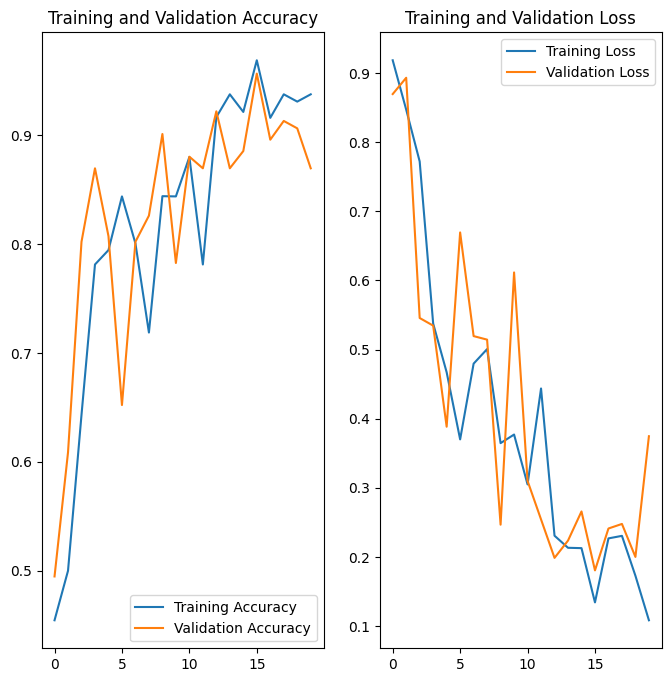

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
predicted label: Potato___Late_blight


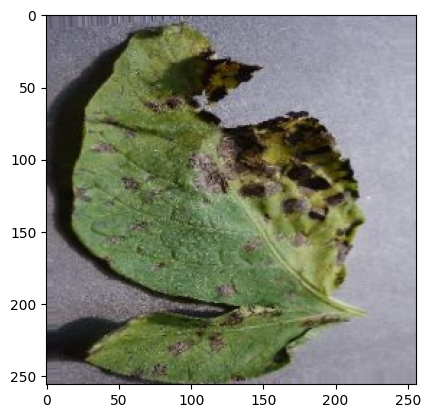

In [29]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [30]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


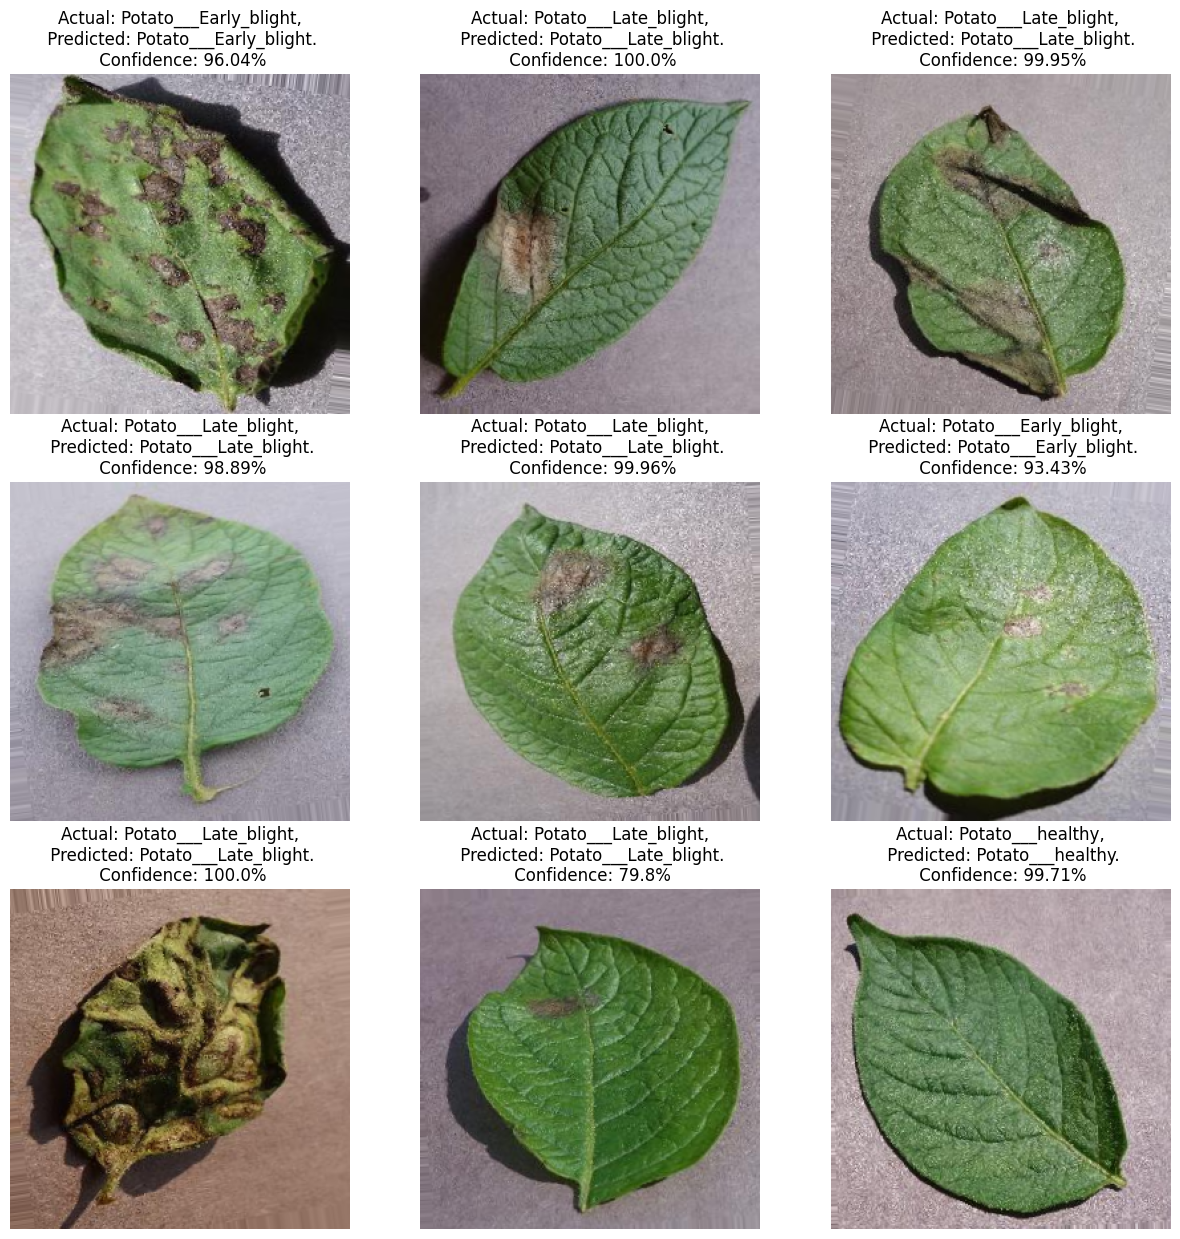

In [31]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [32]:
model.save("../models/5.h5")